In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandahouse
from read_db.CH import Getch
from scipy import stats

In [2]:
data = Getch(''' SELECT user_id, exp_group
                ,countIf(action, action='like') as likes
                ,countIf(action, action='view') as views
                ,countIf(action, action='like') / countIf(action, action='view') as ctr
                FROM simulator_20220720.feed_actions
                WHERE time >=  toUnixTimestamp('2022-06-13')
                AND time <= toUnixTimestamp('2022-06-19')
                AND (exp_group = 0 or exp_group = 1 or exp_group = 2 or exp_group = 3)
                GROUP BY user_id, exp_group
                Order by user_id''').df

# 0 и 3 группы

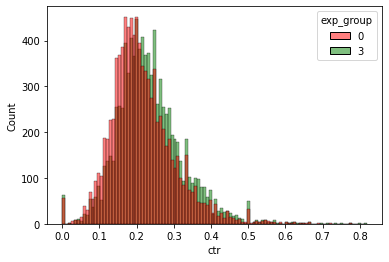

In [13]:
data_0_3 = data.query('exp_group in (0,3)')
sns.histplot(data=data_0_3, x='ctr', hue='exp_group', palette=['r', 'g']);

In [4]:
stats.ttest_ind(data.query('exp_group == 0').ctr, data.query('exp_group == 3').ctr, equal_var=False)

Ttest_indResult(statistic=-15.37656513955401, pvalue=4.9886143333114755e-53)

Т-тест ловит отличия в обычном CTR для 0 и 3 групп. Проведем линеаризацию и посмотрим результаты

In [5]:
ctr_control_0_3 = data.query('exp_group == 0').likes.sum() / data.query('exp_group == 0').views.sum()
data['lin_likes_0_3'] = data.likes - ctr_control_0_3 * data.views
stats.ttest_ind(data.query('exp_group == 0').lin_likes_0_3, data.query('exp_group == 3').lin_likes_0_3, equal_var=False)


Ttest_indResult(statistic=-17.85270664229171, pvalue=1.0721168485295004e-70)

При сравнении линеаризованных лайков чувствительность теста увеличивается

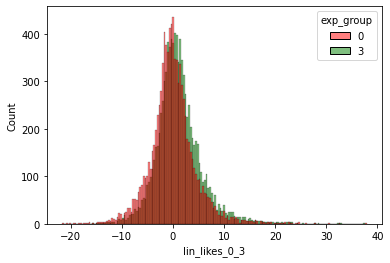

In [11]:
sns.histplot(data=data_0_3, x='lin_likes_0_3', hue='exp_group', palette=['r', 'g']);

# 1 и 2 группы

<AxesSubplot:xlabel='ctr', ylabel='Count'>

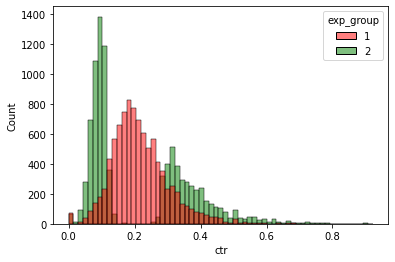

In [14]:
data_1_2 = data.query('exp_group in (1,2)')

sns.histplot(data=data_1_2, x='ctr', hue='exp_group', palette=['r', 'g']);

In [15]:
stats.ttest_ind(data.query('exp_group == 1').ctr, data.query('exp_group == 2').ctr, equal_var=False)

Ttest_indResult(statistic=0.536209812127344, pvalue=0.5918218427419375)

Т-тест различий не выявляет

In [16]:
ctr_control_1_2 = data.query('exp_group == 1').likes.sum() / data.query('exp_group == 1').views.sum()
data['lin_likes_1_2'] = data.likes - ctr_control_1_2 * data.views
stats.ttest_ind(data.query('exp_group == 1').lin_likes_1_2, data.query('exp_group == 2').lin_likes_1_2, equal_var=False)


Ttest_indResult(statistic=6.640734167307404, pvalue=3.2443461735650545e-11)

После линеаризации результат диаметрально противоположный

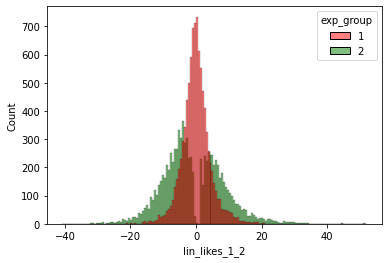

In [18]:
sns.histplot(data=data_1_2, x='lin_likes_1_2', hue='exp_group', palette=['r', 'g']);